In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('crop_yield.csv')

In [ ]:
df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB


In [ ]:
df.describe()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
count,19689.000000,1.968900e+04,1.968900e+04,19689.000000,1.968900e+04,1.968900e+04,19689.000000
mean,2009.127584,1.799266e+05,1.643594e+07,1437.755177,2.410331e+07,4.884835e+04,79.954009
std,6.498099,7.328287e+05,2.630568e+08,816.909589,9.494600e+07,2.132874e+05,878.306193
min,1997.000000,5.000000e-01,0.000000e+00,301.300000,5.417000e+01,9.000000e-02,0.000000
25%,2004.000000,1.390000e+03,1.393000e+03,940.700000,1.880146e+05,3.567000e+02,0.600000
50%,2010.000000,9.317000e+03,1.380400e+04,1247.600000,1.234957e+06,2.421900e+03,1.030000
75%,2015.000000,7.511200e+04,1.227180e+05,1643.700000,1.000385e+07,2.004170e+04,2.388889
max,2020.000000,5.080810e+07,6.326000e+09,6552.700000,4.835407e+09,1.575051e+07,21105.000000


In [ ]:
df.isna().sum()

Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64

# Visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df_year = df[df['Crop_Year']!=2020]  # As the data of 2020 is incomplete

In [ ]:
year_yield = df_year.groupby('Crop_Year').sum()

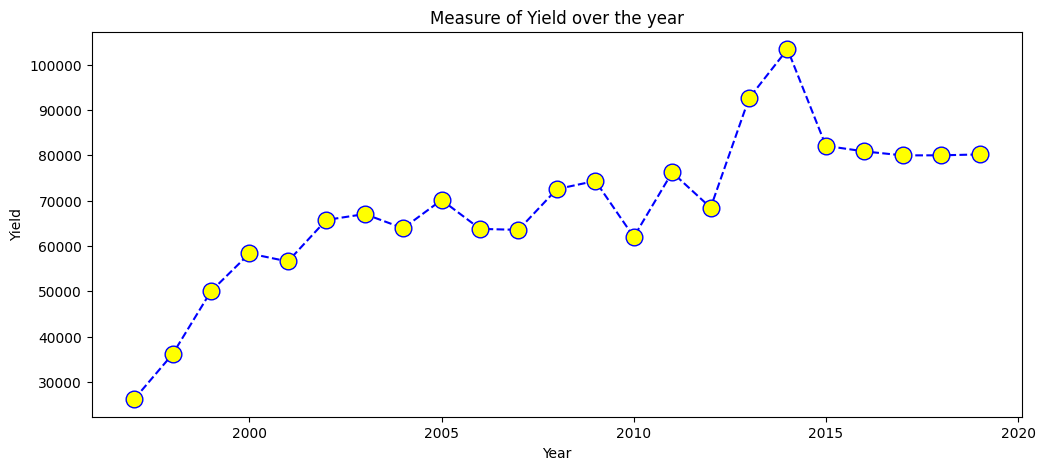

In [ ]:
plt.figure(figsize = (12,5))
plt.plot(year_yield.index, year_yield['Yield'],color='blue', linestyle='dashed', marker='o',
        markersize=12, markerfacecolor='yellow')
plt.xlabel('Year')
plt.ylabel('Yield')
plt.title('Measure of Yield over the year')
plt.show()

It can be observed that the yield has increased over the year, but after 2014 it is showing the declining trend. Reasons can be climate change, decrease in soil fertility

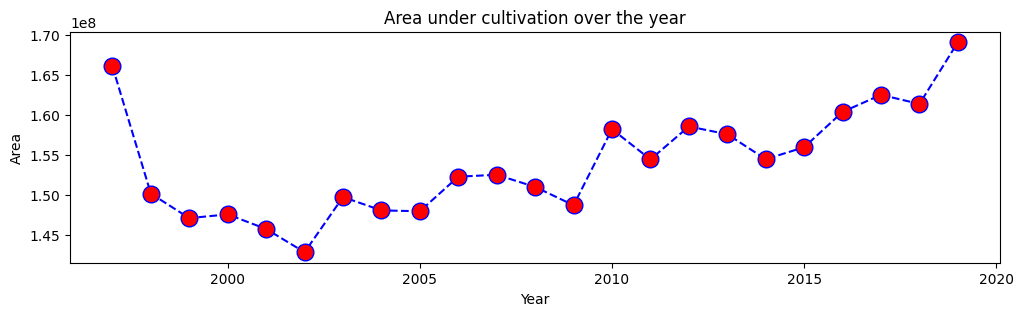

In [ ]:
plt.figure(figsize = (12,3))
plt.plot(year_yield.index, year_yield['Area'],color='blue', linestyle='dashed', marker='o',
        markersize=12, markerfacecolor='red')
plt.xlabel('Year')
plt.ylabel('Area')
plt.title('Area under cultivation over the year')
plt.show()

It can be observed that the area under cultivation has increased substantially. Either with the help of fertilizer and more irrigation fallow land is now under cultivation or area under forest is used for agriculture

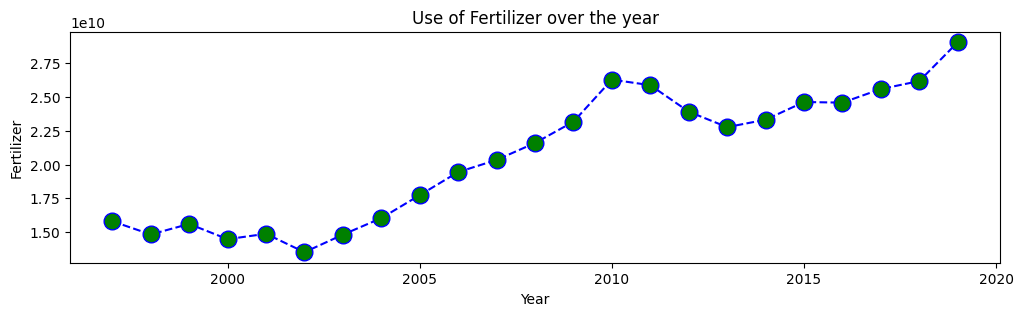

In [ ]:
plt.figure(figsize = (12,3))
plt.plot(year_yield.index, year_yield['Fertilizer'],color='blue', linestyle='dashed', marker='o',
        markersize=12, markerfacecolor='green')
plt.xlabel('Year')
plt.ylabel('Fertilizer')
plt.title('Use of Fertilizer over the year')
plt.show()

The use of Fertilizer in the fields is increasing

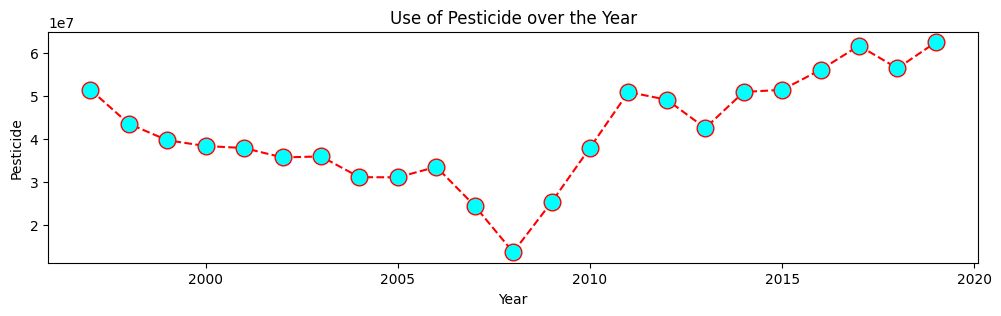

In [ ]:
plt.figure(figsize = (12,3))
plt.plot(year_yield.index, year_yield['Pesticide'],color='red', linestyle='dashed', marker='o',
        markersize=12, markerfacecolor='cyan')
plt.xlabel('Year')
plt.ylabel('Pesticide')
plt.title('Use of Pesticide over the Year')
plt.show()

In [ ]:
df_state = df.groupby('State').sum()
df_state.sort_values(by = 'Yield', inplace=True, ascending = False)

In [ ]:
df_state['Region'] = ['States' for i in range(len(df_state))]

fig = px.bar(df_state, x='Region', y = 'Yield', color=df_state.index, hover_data=['Yield'])
fig.show()

From the above graph it can be observed that the yield of West Bengal is highest. Reason can be more annual rainfall, use of fertilizers

<ipython-input-18-87646b1ad48d>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




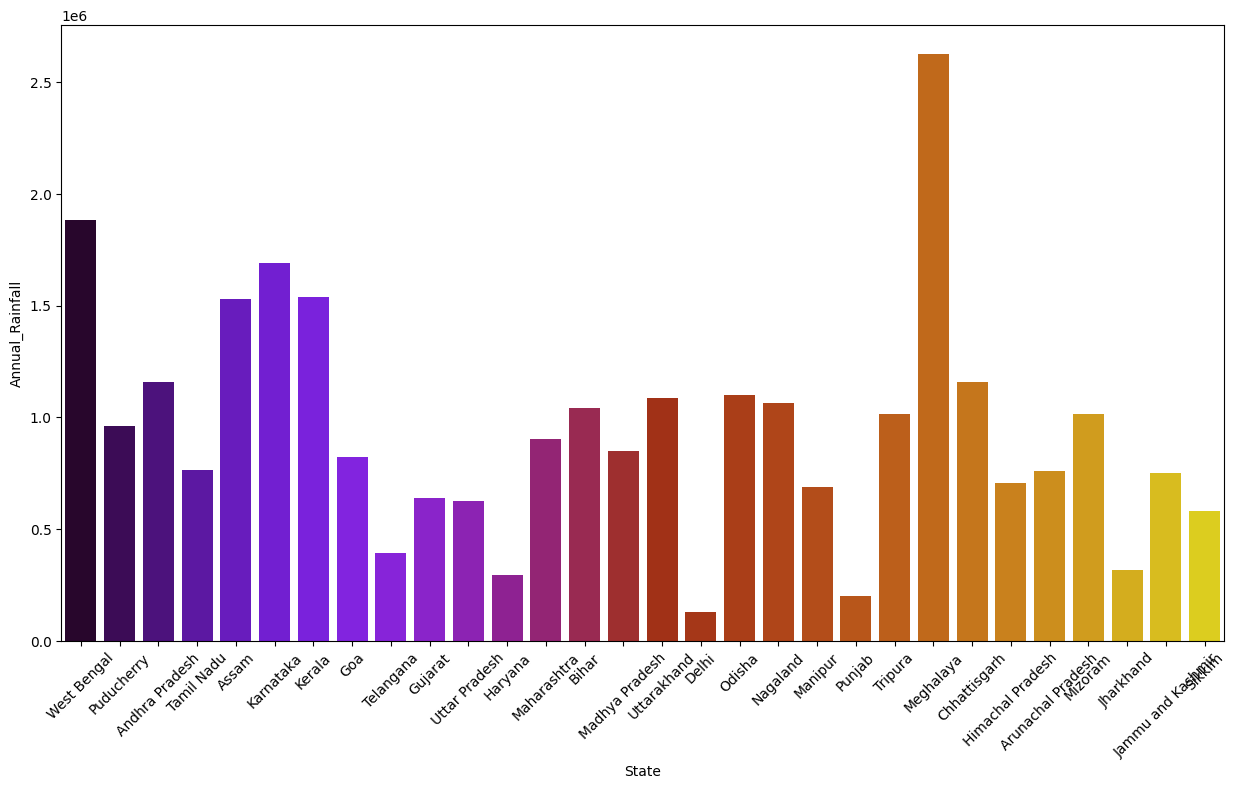

In [ ]:
plt.figure(figsize = (15,8))
sns.barplot(x = df_state.index, y=df_state['Annual_Rainfall'], palette = 'gnuplot')
plt.xticks(rotation = 45)
plt.show()

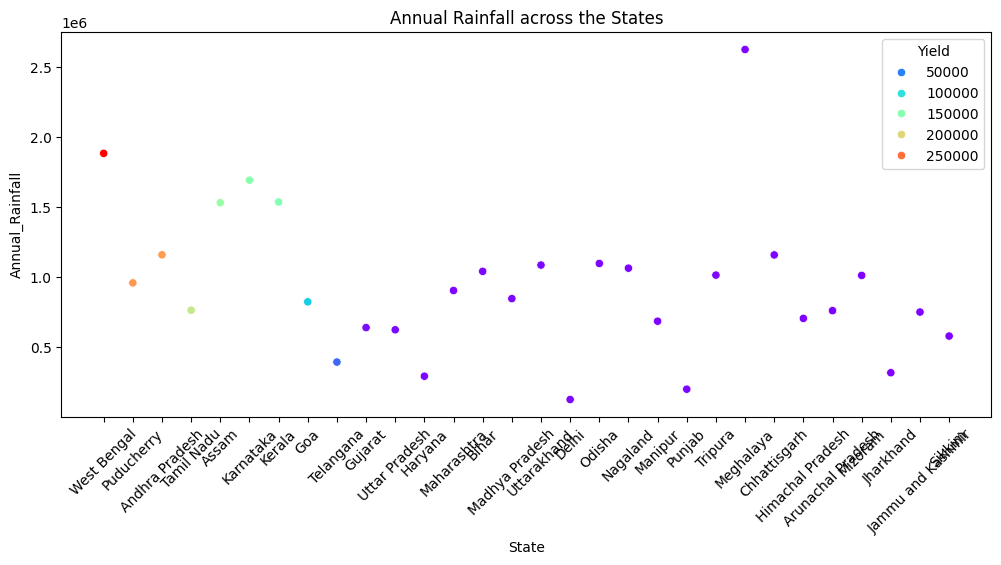

In [ ]:
plt.figure(figsize=(12,5))
sns.scatterplot(x=df_state.index, y = df_state['Annual_Rainfall'], palette='rainbow', hue = df_state['Yield'])
plt.xticks(rotation=45)
plt.title('Annual Rainfall across the States')
plt.show()

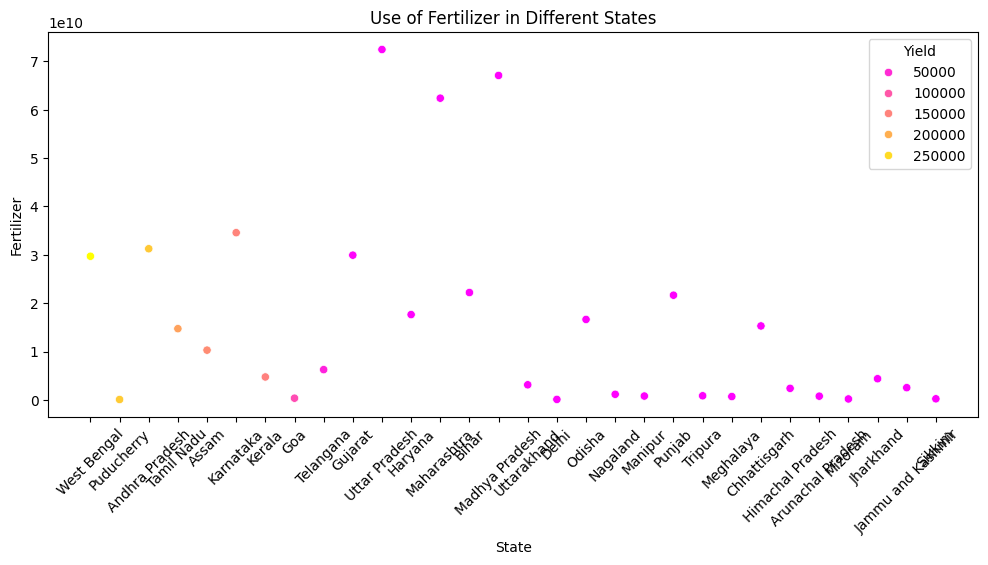

In [ ]:
plt.figure(figsize=(12,5))
sns.scatterplot(x=df_state.index, y=df_state['Fertilizer'], palette='spring', hue = df_state['Yield'])
plt.xticks(rotation=45)
plt.title('Use of Fertilizer in Different States')
plt.show()

Observations:
1.   Annual Rainfall is highest in Chattisgarh but the yield is not the highest.
2.   West Bengal has the maximum yield
3.   Uttar Pradesh, Haryana, Maharashtra are using high amount of fertilizer but yield is not high reason can be low annual rainfall

In [ ]:
df_Seas = df[df['Season']!='Whole Year ']

df_season = df_Seas.groupby('Season').sum()

In [ ]:
fig = px.bar(df_season, y = 'Area', color=df_season.index, hover_data=['Area'],text = 'Area')
fig.show()

In [ ]:
fig = px.sunburst(df_season, path=[df_season.index, 'Yield'], values='Yield',
                  color=df_season.index, hover_data=['Yield'])
fig.show()

Observations:
1. Area under cultivation in Kharif season is highest, second is Rabi season
2. Crops in autumn, summer are not grown over large area
3. Yield in India is maximum in Kharif season

In [ ]:
# Where the Yield is zero
df_yz = df[df['Yield']==0]
df_yz.shape

(112, 10)

In [ ]:
df_yz.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
92,Cardamom,1997,Whole Year,West Bengal,2674.0,7,1852.9,254484.58,828.94,0.0
125,Sunflower,1997,Whole Year,West Bengal,278.0,1,1852.9,26457.26,86.18,0.0
1058,Soyabean,2002,Kharif,Andhra Pradesh,41284.0,0,648.1,3908356.28,10321.00,0.0
1134,other oilseeds,2002,Whole Year,Kerala,2253.0,0,2511.2,213291.51,563.25,0.0
1135,Arecanut,2002,Whole Year,Tamil Nadu,4956.0,0,315.9,469184.52,1239.00,0.0


<ipython-input-26-f5475870c74c>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Figure size 2500x1500 with 0 Axes>

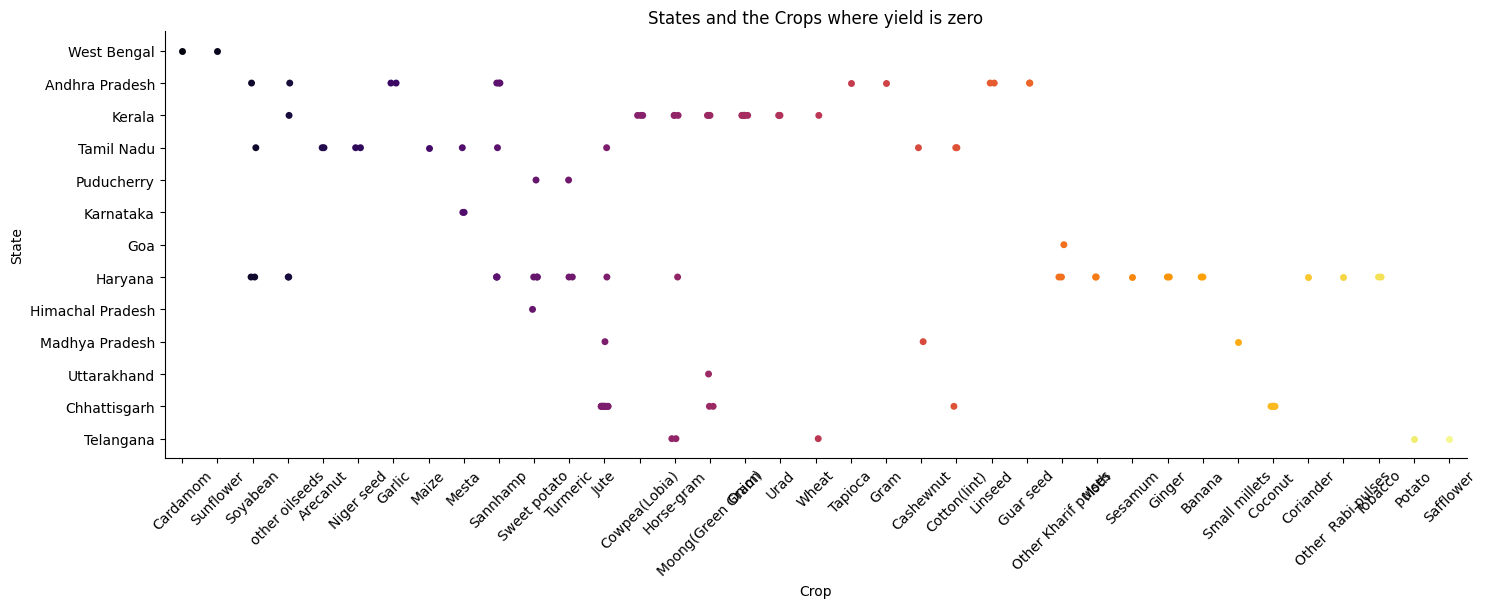

In [ ]:
plt.figure(figsize = (25,15))
sns.catplot(y="State", x="Crop",data=df_yz, aspect = 3, palette ='inferno')
plt.xticks(rotation=45)
plt.title('States and the Crops where yield is zero')
plt.show()

In [ ]:
df_ynz = df[df['Yield']>0]  # where yield is more than zero
df_crop = df_ynz.groupby('Crop').sum()

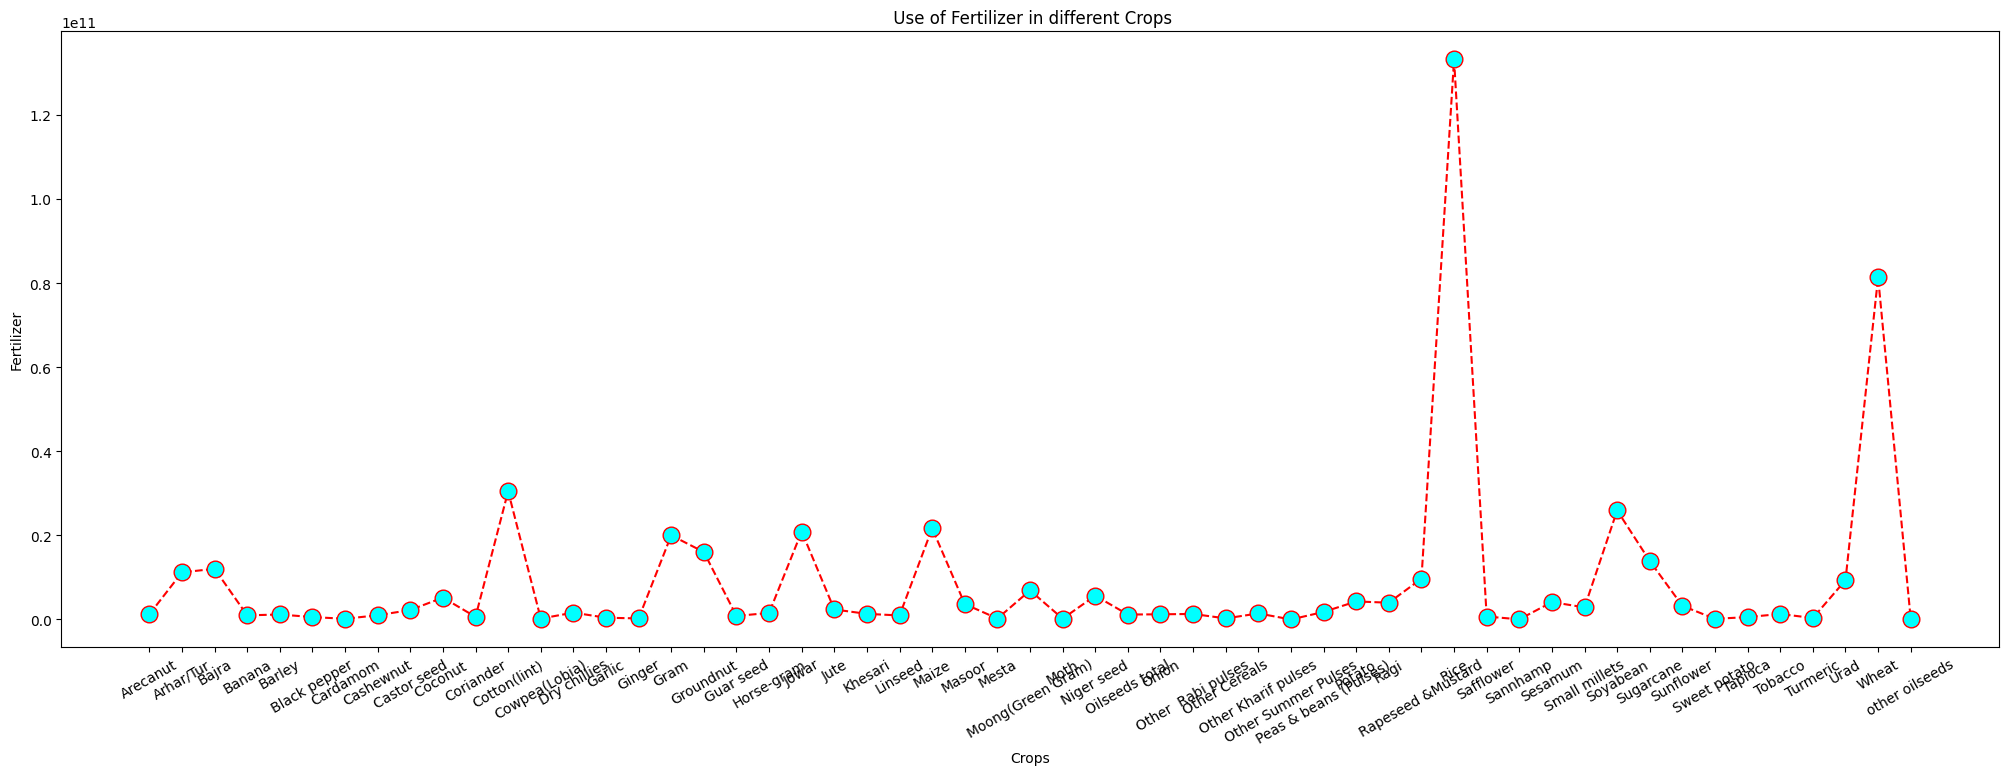

In [ ]:
plt.figure(figsize = (25,8))
plt.plot(df_crop.index, df_crop['Fertilizer'],color='red', linestyle='dashed', marker='o',
        markersize=12, markerfacecolor='cyan')
plt.xlabel('Crops')
plt.ylabel('Fertilizer')
plt.title(' Use of Fertilizer in different Crops')
plt.xticks(rotation=30)
plt.show()

The amount of Fertilizer used is maximum in Rice Crop
The second crop to use more fertilizer is Wheat crop

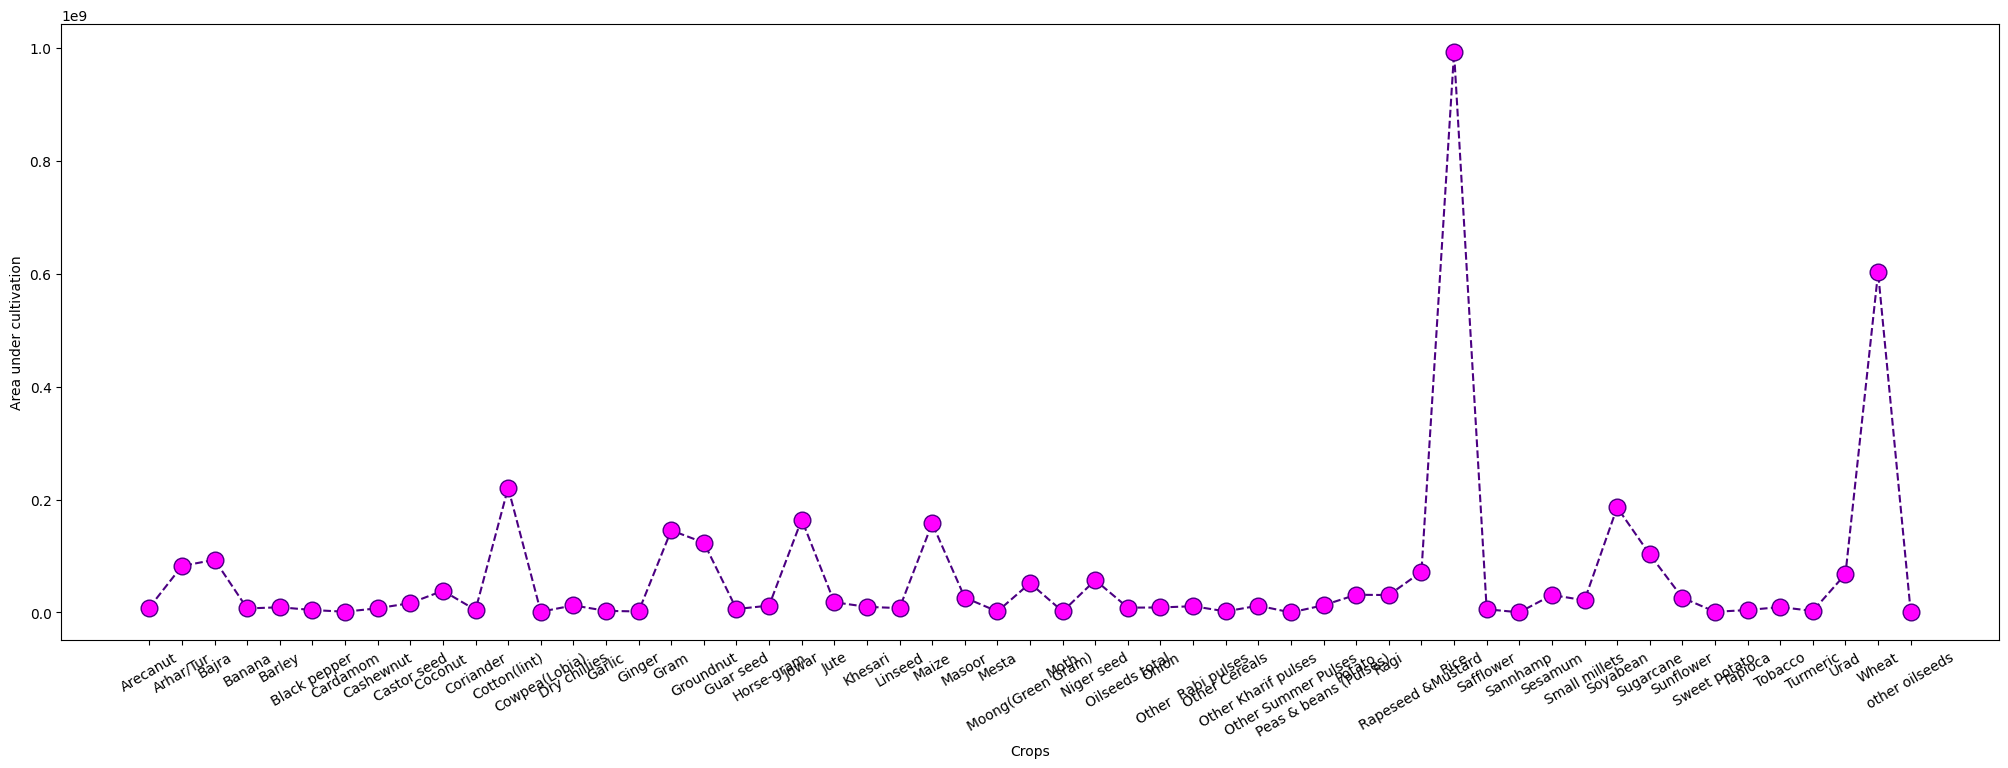

In [ ]:
plt.figure(figsize = (25,8))
plt.plot(df_crop.index, df_crop['Area'],color='indigo', linestyle='dashed', marker='o',
        markersize=12, markerfacecolor='fuchsia')
plt.xlabel('Crops')
plt.ylabel('Area under cultivation')
plt.xticks(rotation=30)
plt.show()

Area under cultivation is larger for Rice and Wheat crops

In [ ]:
df_wheat = df[df['Crop']=='Wheat']
df_wheat.reset_index(drop=True,inplace=True)

In [ ]:
df_wheat1 = df_wheat[df_wheat['Crop_Year']!=2020]
df_wheat_year = df_wheat1.groupby('Crop_Year').sum()

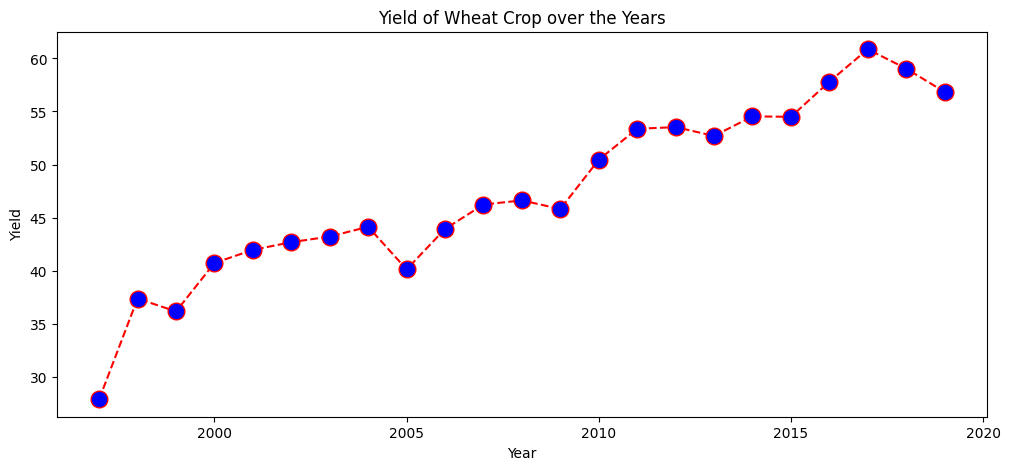

In [ ]:
plt.figure(figsize = (12,5))
plt.plot(df_wheat_year.index, df_wheat_year['Yield'],color='red', linestyle='dashed', marker='o',
        markersize=12, markerfacecolor='blue')
plt.xlabel('Year')
plt.ylabel('Yield')
plt.title('Yield of Wheat Crop over the Years')
plt.show()

In [ ]:
df1 = df.copy()
df1 = df1.drop(['Crop_Year','Pesticide'], axis = 1)

<ipython-input-34-1c575c9f9ecb>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-34-1c575c9f9ecb>:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-34-1c575c9f9ecb>:8: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use ei

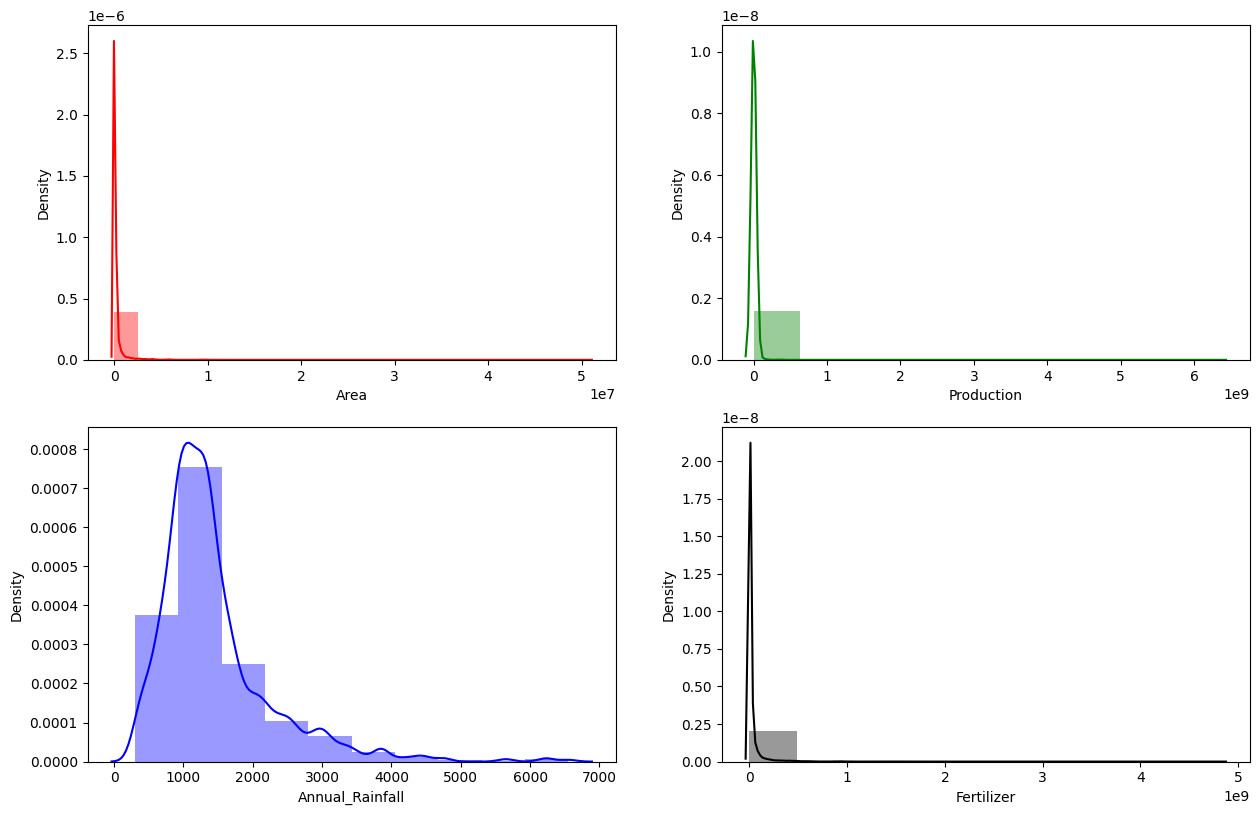

In [ ]:
# To check the distribution of dataset
plt.figure(figsize=(15,20))
plt.subplot(4,2,1)
sns.distplot(df1['Area'],bins = 20,color = 'red')
plt.subplot(4,2,2)
sns.distplot(df1['Production'],bins = 10,color = 'green')
plt.subplot(4,2,3)
sns.distplot(df1['Annual_Rainfall'],bins = 10,color = 'blue')
plt.subplot(4,2,4)
sns.distplot(df1['Fertilizer'],bins = 10, color = 'black')
plt.show()

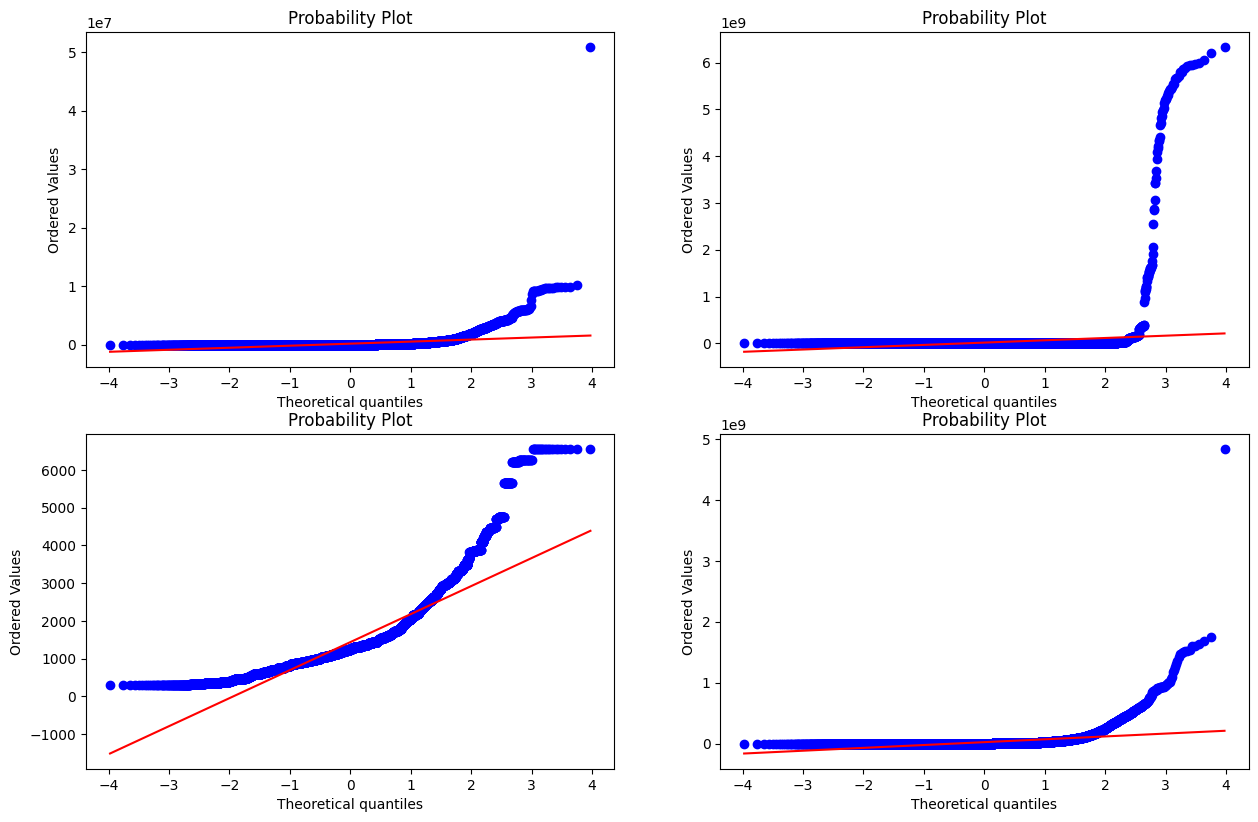

In [ ]:
# Q-Q plot of the dataset
import scipy.stats as stats

plt.figure(figsize=(15,20))
plt.subplot(4,2,1)
stats.probplot(df1['Area'], dist = 'norm', plot = plt)
plt.subplot(4,2,2)
stats.probplot(df1['Production'], dist = 'norm', plot = plt)
plt.subplot(4,2,3)
stats.probplot(df1['Annual_Rainfall'], dist = 'norm', plot = plt)
plt.subplot(4,2,4)
stats.probplot(df1['Fertilizer'], dist = 'norm', plot = plt)
plt.show()

Data distribution have right skewness - to remove skewness using transformation approach
The algorithm is more likely to be biased when the data distribution is skewed

In [ ]:
category_columns = df1.select_dtypes(include = ['object']).columns
category_columns

Index(['Crop', 'Season', 'State'], dtype='object')

In [ ]:
df1 = pd.get_dummies(df1, columns = category_columns, drop_first=True)

In [ ]:
df1.shape

(19689, 93)

In [ ]:
df1.head()

,Area,Production,Annual_Rainfall,Fertilizer,Yield,Crop_Arhar/Tur,Crop_Bajra,Crop_Banana,Crop_Barley,Crop_Black pepper,...,State_Odisha,State_Puducherry,State_Punjab,State_Sikkim,State_Tamil Nadu,State_Telangana,State_Tripura,State_Uttar Pradesh,State_Uttarakhand,State_West Bengal
0,73814.0,56708,2051.4,7024878.38,0.796087,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,6637.0,4685,2051.4,631643.29,0.710435,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,796.0,22,2051.4,75755.32,0.238333,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,19656.0,126905000,2051.4,1870661.52,5238.051739,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1739.0,794,2051.4,165500.63,0.420909,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
x = df1.drop(['Yield'], axis = 1)
y = df1[['Yield']]

In [ ]:
#split the data into training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [ ]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')

x_train_transform1 = pt.fit_transform(x_train)
x_test_transform1 = pt.fit_transform(x_test)

In [ ]:
df_trans = pd.DataFrame(x_train_transform1, columns=x_train.columns)
df_trans.head()

,Area,Production,Annual_Rainfall,Fertilizer,Crop_Arhar/Tur,Crop_Bajra,Crop_Banana,Crop_Barley,Crop_Black pepper,Crop_Cardamom,...,State_Odisha,State_Puducherry,State_Punjab,State_Sikkim,State_Tamil Nadu,State_Telangana,State_Tripura,State_Uttar Pradesh,State_Uttarakhand,State_West Bengal
0,-1.481169,-0.556003,0.244990,-1.453248,-0.161422,-0.167244,-0.110415,-0.12409,-0.083312,-0.062718,...,-0.199985,-0.186447,-0.143743,-0.109401,-0.209413,-0.145052,-0.151442,-0.212974,-0.204456,-0.241079
1,-0.431685,-0.583521,-1.025908,-0.384454,-0.161422,-0.167244,-0.110415,-0.12409,-0.083312,-0.062718,...,-0.199985,-0.186447,-0.143743,-0.109401,-0.209413,-0.145052,-0.151442,-0.212974,-0.204456,-0.241079
2,0.365251,0.209853,-0.356186,0.410859,-0.161422,-0.167244,-0.110415,-0.12409,-0.083312,-0.062718,...,-0.199985,-0.186447,-0.143743,-0.109401,-0.209413,-0.145052,-0.151442,-0.212974,-0.204456,-0.241079
3,0.816329,0.362182,-0.446026,0.873142,-0.161422,-0.167244,-0.110415,-0.12409,-0.083312,-0.062718,...,-0.199985,-0.186447,-0.143743,-0.109401,-0.209413,-0.145052,-0.151442,-0.212974,-0.204456,-0.241079
4,1.688200,1.511150,-2.572993,1.552825,-0.161422,-0.167244,-0.110415,-0.12409,-0.083312,-0.062718,...,-0.199985,-0.186447,-0.143743,-0.109401,-0.209413,-0.145052,-0.151442,-0.212974,-0.204456,-0.241079


<ipython-input-44-5f4d14581f2c>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-44-5f4d14581f2c>:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-44-5f4d14581f2c>:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use ei

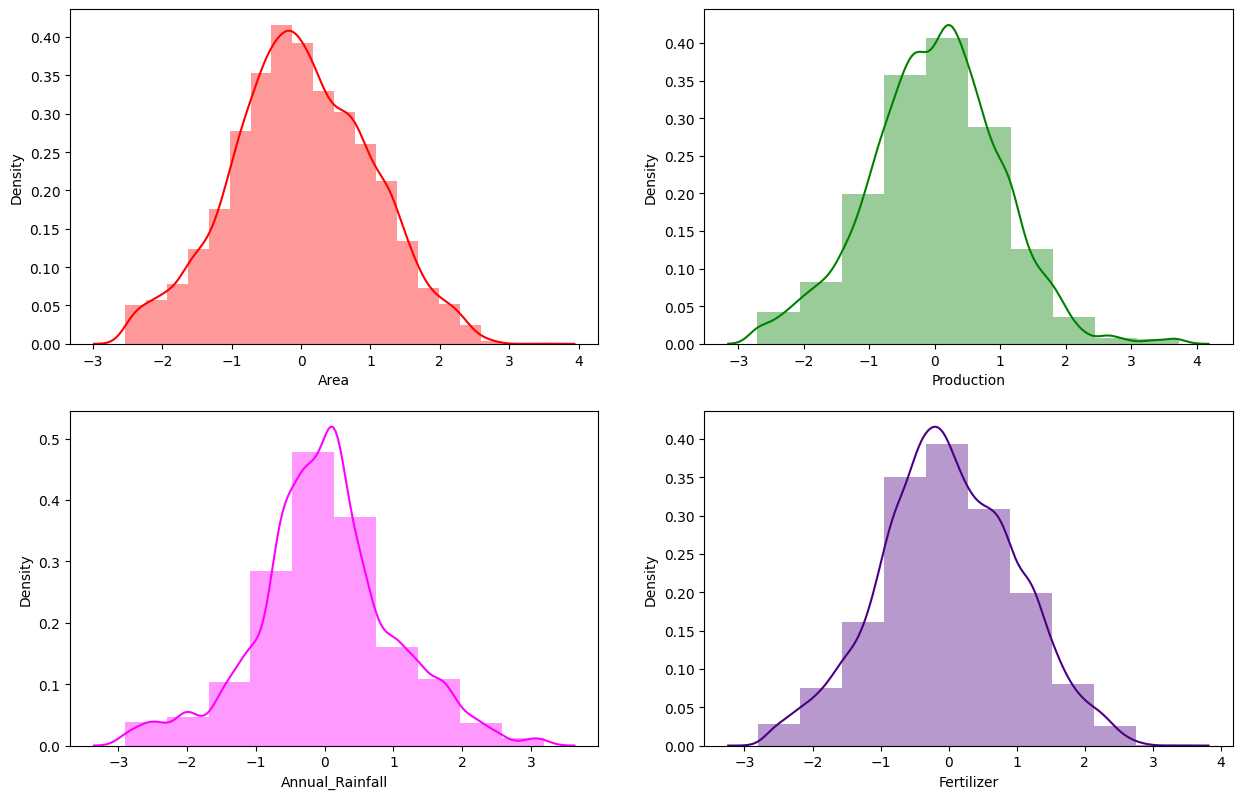

In [ ]:
plt.figure(figsize=(15,20))
plt.subplot(4,2,1)
sns.distplot(df_trans['Area'],bins = 20,color = 'red')
plt.subplot(4,2,2)
sns.distplot(df_trans['Production'],bins = 10,color = 'green')
plt.subplot(4,2,3)
sns.distplot(df_trans['Annual_Rainfall'],bins = 10,color = 'fuchsia')
plt.subplot(4,2,4)
sns.distplot(df_trans['Fertilizer'],bins = 10, color = 'indigo')

plt.show()

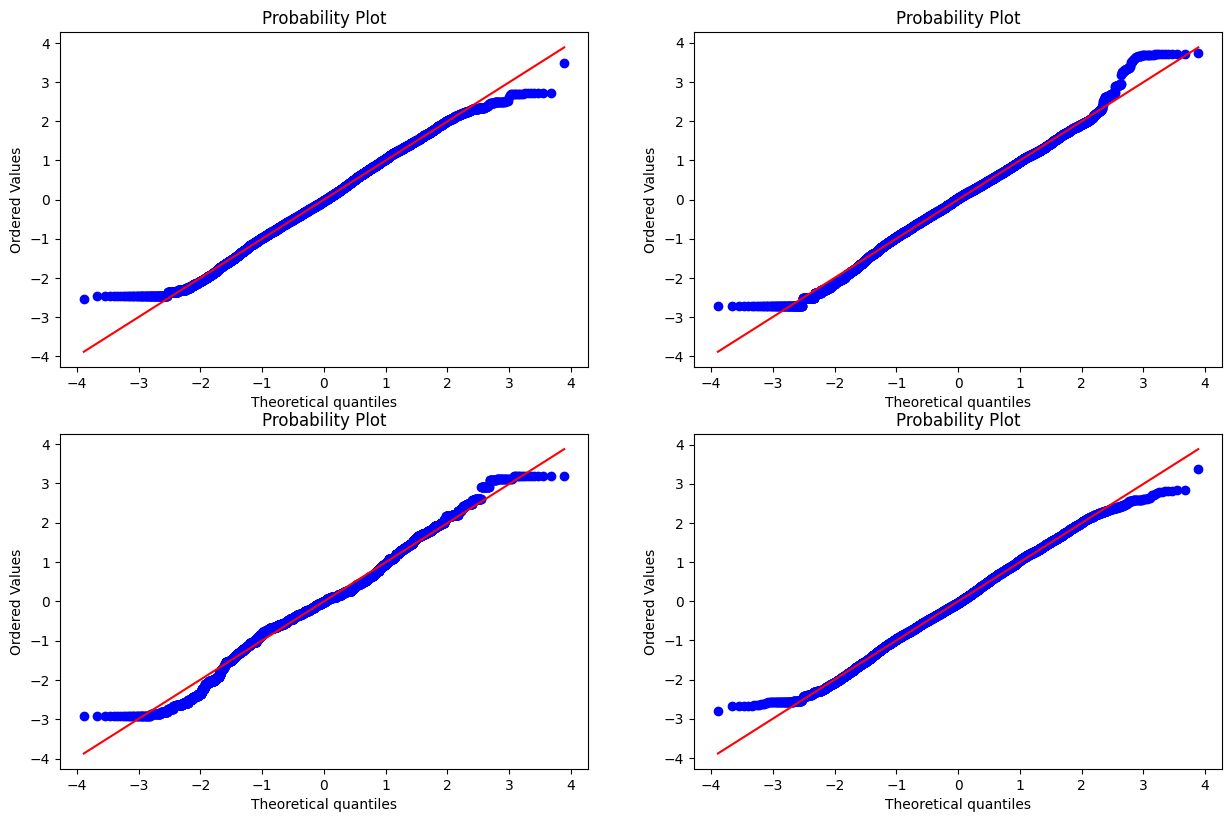

In [ ]:
plt.figure(figsize=(15,20))
plt.subplot(4,2,1)
stats.probplot(df_trans['Area'], dist = 'norm', plot = plt)
plt.subplot(4,2,2)
stats.probplot(df_trans['Production'], dist = 'norm', plot = plt)
plt.subplot(4,2,3)
stats.probplot(df_trans['Annual_Rainfall'], dist = 'norm', plot = plt)
plt.subplot(4,2,4)
stats.probplot(df_trans['Fertilizer'], dist = 'norm', plot = plt)

plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [ ]:
def modelling(model, title = "Default"):
    model.fit(x_train_transform1, y_train)
    y_pred = model.predict(x_test_transform1)
    print('Mean Square Error', title, ':', mean_squared_error(y_test, y_pred))
    print('Root Mean Square Error', title, ':', mean_squared_error(y_test, y_pred, squared=False))
    print("Mean Absolute Error", title, ':', mean_absolute_error(y_test, y_pred))
    print('R-Squared (R^2) Error', title, ':', r2_score(y_test, y_pred))
    print("")

In [ ]:
lr = LinearRegression()
modelling(lr, 'Linear Regression')
knn = KNeighborsRegressor(n_neighbors=5)
modelling(knn, "KNN")
dtr = DecisionTreeRegressor(max_depth=10)
modelling(dtr, "Decision Tree Regressor")
rf = RandomForestRegressor(n_estimators=1000, random_state=42)
modelling(rf, 'Random Forest Regressor')
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate = 0.1, max_depth = 10, random_state = 42)
modelling(gbr, 'Gradient Boosting Regressor')
svr = SVR(kernel = 'rbf', C=100, gamma=0.1, epsilon = 0.1)
modelling(svr, 'Support Vector Regression')

Mean Square Error Linear Regression : 148445.29463298403
Root Mean Square Error Linear Regression : 385.28599070428714
Mean Absolute Error Linear Regression : 79.70795840700268
R-Squared (R^2) Error Linear Regression : 0.8089635049182979

Mean Square Error KNN : 47577.246782290385
Root Mean Square Error KNN : 218.12209145863787
Mean Absolute Error KNN : 12.814949521636365
R-Squared (R^2) Error KNN : 0.9387721214512218

Mean Square Error Decision Tree Regressor : 39492.13482192135
Root Mean Square Error Decision Tree Regressor : 198.7262811555667
Mean Absolute Error Decision Tree Regressor : 13.371297189488931
R-Squared (R^2) Error Decision Tree Regressor : 0.9491769743303299



<ipython-input-47-0a49dd5b2373>:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Mean Square Error Random Forest Regressor : 41080.73047011679
Root Mean Square Error Random Forest Regressor : 202.6838189647037
Mean Absolute Error Random Forest Regressor : 11.847538738742296
R-Squared (R^2) Error Random Forest Regressor : 0.9471325865611949



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Mean Square Error Gradient Boosting Regressor : 34816.71208007326
Root Mean Square Error Gradient Boosting Regressor : 186.59236876162234
Mean Absolute Error Gradient Boosting Regressor : 12.445516949826125
R-Squared (R^2) Error Gradient Boosting Regressor : 0.9551938465783606



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Mean Square Error Support Vector Regression : 588845.224567157
Root Mean Square Error Support Vector Regression : 767.3625118333297
Mean Absolute Error Support Vector Regression : 61.43888406118309
R-Squared (R^2) Error Support Vector Regression : 0.24220617349286933



Mean Squared Error: 119642.52989284076
Root Mean Squared Error: 345.89381303059
Mean Absolute Error: 15.533794717648979
R-squared: 0.8460302185397965


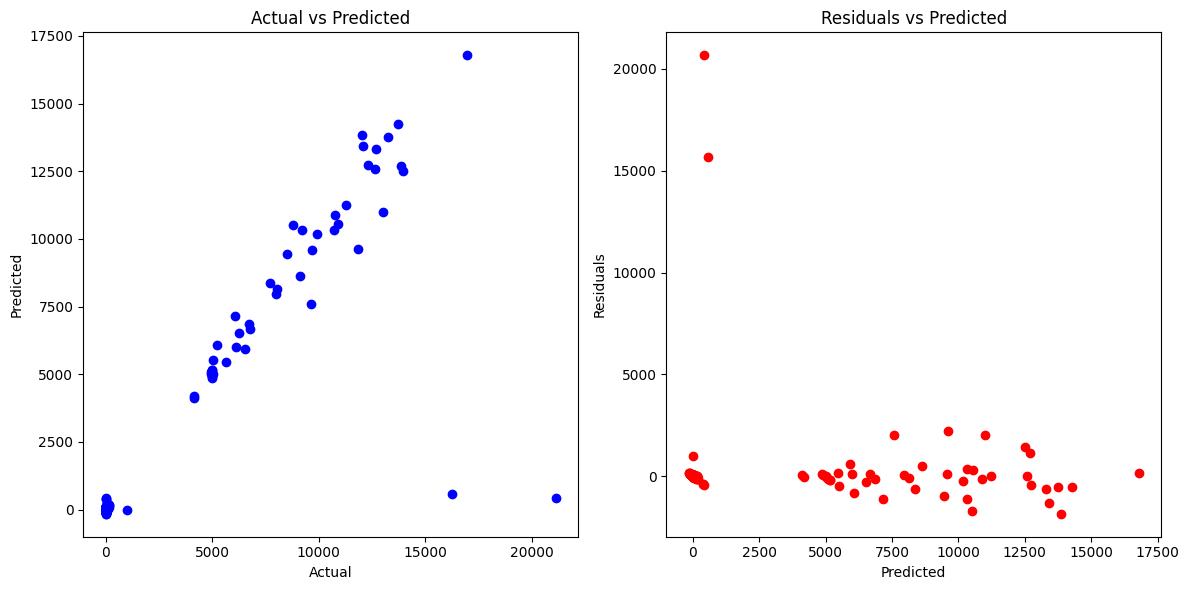

In [ ]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
# Create interaction terms
poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
X_train_inter = poly.fit_transform(x_train)
X_test_inter = poly.transform(x_test)

# Create and train the model
model = LinearRegression()
model.fit(X_train_inter, y_train)

# Make predictions
y_pred = model.predict(X_test_inter)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

# Plot the results
fig = plt.figure(figsize=(12, 6))

# Actual vs Predicted
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

# Residuals
plt.subplot(1, 2, 2)
plt.scatter(y_pred, y_test - y_pred, color='red')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')

plt.tight_layout()
plt.show()